reference: https://www.kaggle.com/code/rutvikdeshpande/fashion-mnist-cnn-beginner-98/notebook

In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
import math
import datetime

In [2]:
### enable google drive access
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
### preprocess data

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# need to add the color channel 
train_images = train_images.reshape((*train_images.shape, 1)) # (*train_images.shape, 1) is (60000, 28, 28, 1), where the last 1 means there is one color channel
test_images = test_images.reshape((*test_images.shape, 1)) 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


<h2>Constants</h2>

In [4]:
# constants
BATCH_SIZE = 128
TRAIN_SAMPLE_SIZE = train_images.shape[0] # 60000
TEST_LABELS_SIZE = len(test_labels) # 10000

In [37]:
# We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers
model = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function 
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

train_model = model.fit(train_images, train_labels,
                  batch_size=BATCH_SIZE,
                  epochs=10)

Epoch 1/10
469/469 [==============================] - 68s 144ms/step - loss: 0.4781 - accuracy: 0.8300
Epoch 2/10
469/469 [==============================] - 68s 146ms/step - loss: 0.3086 - accuracy: 0.8885
Epoch 3/10
469/469 [==============================] - 68s 145ms/step - loss: 0.2618 - accuracy: 0.9051
Epoch 4/10
469/469 [==============================] - 68s 145ms/step - loss: 0.2306 - accuracy: 0.9160
Epoch 5/10
469/469 [==============================] - 66s 142ms/step - loss: 0.2066 - accuracy: 0.9249
Epoch 6/10
469/469 [==============================] - 67s 144ms/step - loss: 0.1894 - accuracy: 0.9317
Epoch 7/10
469/469 [==============================] - 66s 141ms/step - loss: 0.1710 - accuracy: 0.9377
Epoch 8/10
469/469 [==============================] - 68s 145ms/step - loss: 0.1534 - accuracy: 0.9440
Epoch 9/10
469/469 [==============================] - 66s 140ms/step - loss: 0.1374 - accuracy: 0.9503
Epoch 10/10
469/469 [==============================] - 66s 141ms/step - l

In [ ]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2, batch_size=BATCH_SIZE)

<h1>20220823</h1>

In [15]:
BATCH_SIZE = 128
TRAIN_SAMPLE_SIZE = train_images.shape[0] # 60000

### set up model ###

# We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers
model = tf.keras.Sequential()

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function 
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))

### compile model ###

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### ModelCheckpoint callback that saves the model's weights every epoch ###

CHECKPOINT_PATH = '/content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_epoch={epoch}.ckpt'

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=CHECKPOINT_PATH, 
    verbose=1, 
    save_weights_only=True,
    save_freq = 'epoch')

# if you want every 5 epochs, write
# save_freq = 5 * int(TRAIN_SAMPLE_SIZE / BATCH_SIZE)

### tensorboard ###
folder_name = "clothing_CNN_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "/content/gdrive/My Drive/Colab/logs/fit/" + folder_name
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [16]:
train_model = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=100, callbacks=[cp_callback, tensorboard_callback])

Epoch 1/100
469/469 [==============================] - ETA: 0s - loss: 0.4887 - accuracy: 0.8235
Epoch 1: saving model to /content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_epoch=1.ckpt
469/469 [==============================] - 70s 138ms/step - loss: 0.4887 - accuracy: 0.8235
Epoch 2/100
469/469 [==============================] - ETA: 0s - loss: 0.3148 - accuracy: 0.8875
Epoch 2: saving model to /content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_epoch=2.ckpt
469/469 [==============================] - 61s 131ms/step - loss: 0.3148 - accuracy: 0.8875
Epoch 3/100
469/469 [==============================] - ETA: 0s - loss: 0.2707 - accuracy: 0.9025
Epoch 3: saving model to /content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_epoch=3.ckpt
469/469 [==============================] - 61s 130ms/step - loss: 0.2707 - accuracy: 0.9025
Epoch 4/100
469/469 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.9122
Epoch 4: saving model to /content/gdrive/My Drive/Cola

In [18]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2, batch_size=BATCH_SIZE) # badly overfitting: test accuracy is only 90.6%

79/79 - 3s - loss: 0.9637 - accuracy: 0.9063 - 3s/epoch - 33ms/step


Let's see where the model makes mistakes.

In [56]:
probs = model.predict(test_images)
# since predict outputs a *batch* of probability distributions, the shape of probs is (10000, 10)

TEST_LABELS_SIZE = len(test_labels) # 10000
mismatches = [] # stores the indices of test images with incorrect predictions
preds = np.argmax(probs, axis=1) # model predictions. applies np.argmax to each probability distribution, an array of length 10
for i in range(TEST_LABELS_SIZE):
  if preds[i] != test_labels[i]:
    mismatches.append(i)

print(mismatches)
print(len(mismatches))

[14, 17, 23, 25, 42, 49, 51, 67, 68, 75, 89, 91, 103, 136, 147, 150, 166, 172, 193, 217, 222, 227, 244, 247, 248, 265, 266, 271, 316, 324, 325, 341, 342, 361, 368, 374, 379, 381, 382, 392, 406, 409, 413, 441, 444, 452, 459, 460, 465, 476, 477, 490, 498, 510, 529, 536, 541, 547, 554, 563, 569, 587, 607, 634, 635, 639, 670, 674, 688, 711, 724, 732, 736, 738, 753, 760, 787, 800, 801, 805, 811, 817, 851, 875, 905, 921, 924, 925, 937, 939, 956, 960, 965, 971, 979, 994, 1000, 1025, 1028, 1029, 1055, 1091, 1104, 1111, 1129, 1131, 1139, 1162, 1165, 1192, 1197, 1202, 1210, 1231, 1234, 1241, 1253, 1254, 1259, 1280, 1285, 1294, 1297, 1300, 1305, 1329, 1335, 1336, 1374, 1385, 1387, 1390, 1396, 1408, 1425, 1449, 1452, 1458, 1462, 1469, 1482, 1489, 1493, 1496, 1501, 1509, 1524, 1527, 1533, 1543, 1557, 1572, 1609, 1620, 1632, 1643, 1645, 1650, 1665, 1679, 1680, 1684, 1695, 1712, 1740, 1743, 1763, 1803, 1810, 1822, 1826, 1836, 1856, 1878, 1917, 1920, 1922, 1942, 1943, 1964, 1968, 1980, 2001, 2006, 201

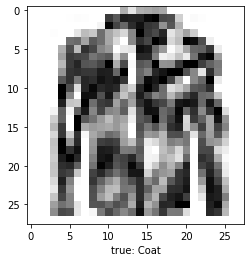

In [59]:
### shows image and true label of test image i

i = 17 # simply change here if you want another test image
img = test_images[i] # i^th test image
img_no_color_channel = img[:, :, 0]
true_label = class_names[test_labels[i]]
plt.imshow(img_no_color_channel, cmap=plt.cm.binary)
plt.xlabel(f"true: {true_label}")
plt.show()

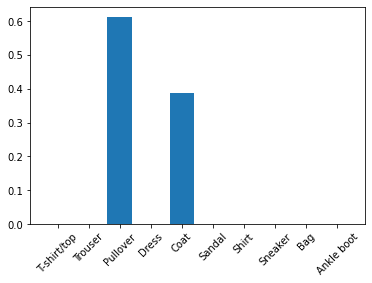

In [58]:
### displays probability distribution of labels of test image i that the model predicts

probs = model.predict(np.expand_dims(img, 0)) # we use np.expand_dims because predict must take in a *batch* of data
probs = probs[0] # predict outputs a *batch* of probability distributions
plt.bar(x=range(10), height=probs)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [36]:
probs

array([[7.6702559e-22, 1.0000000e+00, 1.8819515e-37, 7.4107993e-28,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.0673943e-38, 0.0000000e+00]], dtype=float32)

In [31]:
class_names[1]

'Trouser'

In [14]:
#tf.keras.backend.clear_session()

Should I remove the relu in the first conv layer?

I noticed that the model confuses pullover and coat. 
See which pair of labels the model confuses the most, go back to the epoch where the model wasn't overtrained (causing overfitting) yet, and train from there but with more of those labels. I think humans also learn this way: look at more examples of what confuses you, and you will eventually understand.

<h1>0825</h1>
<h1>add dropout</h1>

In [4]:
# constants
BATCH_SIZE = 128
TRAIN_SAMPLE_SIZE = train_images.shape[0] # 60000
TEST_LABELS_SIZE = len(test_labels) # 10000

In [6]:
### set up model with dropout ###

# We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers
model = tf.keras.Sequential()

# dropout
model.add(tf.keras.layers.Dropout(.3, input_shape=(28, 28, 1)))

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(.3))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(.3))

# Fully connected layer with ReLU activation function 
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))

### compile model ###

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### ModelCheckpoint callback that saves the model's weights every epoch ###

CHECKPOINT_PATH = '/content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_with_dropout_epoch={epoch}.ckpt'

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=CHECKPOINT_PATH, 
    verbose=1, 
    save_weights_only=True,
    save_freq = 'epoch')

# if you want every 5 epochs, write
# save_freq = 5 * int(TRAIN_SAMPLE_SIZE / BATCH_SIZE)

### tensorboard ###
folder_name = "clothing_CNN_with_dropout_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "/content/gdrive/My Drive/Colab/logs/fit/" + folder_name
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


In [7]:
train_model = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=100, callbacks=[cp_callback, tensorboard_callback])

Epoch 1/100
469/469 [==============================] - ETA: 0s - loss: 0.6025 - accuracy: 0.7777
Epoch 1: saving model to /content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_with_dropout_epoch=1.ckpt
469/469 [==============================] - 78s 164ms/step - loss: 0.6025 - accuracy: 0.7777
Epoch 2/100
469/469 [==============================] - ETA: 0s - loss: 0.4297 - accuracy: 0.8440
Epoch 2: saving model to /content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_with_dropout_epoch=2.ckpt
469/469 [==============================] - 73s 156ms/step - loss: 0.4297 - accuracy: 0.8440
Epoch 3/100
469/469 [==============================] - ETA: 0s - loss: 0.3854 - accuracy: 0.8595
Epoch 3: saving model to /content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_with_dropout_epoch=3.ckpt
469/469 [==============================] - 73s 156ms/step - loss: 0.3854 - accuracy: 0.8595
Epoch 4/100
469/469 [==============================] - ETA: 0s - loss: 0.3611 - accuracy: 0.8653
Epoch 4: saving

In [58]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2, batch_size=BATCH_SIZE) # even worse test acc: 85.8%

79/79 - 3s - loss: 0.4221 - accuracy: 0.8578 - 3s/epoch - 38ms/step


In [7]:
probs = model.predict(test_images)
# since predict outputs a *batch* of probability distributions, the shape of probs is (10000, 10)

In [8]:
mismatches = [] # stores the indices of test images with incorrect predictions
preds = np.argmax(probs, axis=1) # model predictions. applies np.argmax to each probability distribution, an array of length 10
for i in range(TEST_LABELS_SIZE):
  if preds[i] != test_labels[i]:
    mismatches.append(i)

print(mismatches)
print(len(mismatches))

[14, 21, 23, 25, 40, 42, 48, 51, 57, 67, 68, 89, 98, 107, 109, 124, 127, 130, 136, 145, 147, 150, 153, 155, 156, 168, 170, 187, 192, 210, 213, 227, 229, 238, 239, 244, 247, 252, 261, 266, 279, 282, 289, 313, 315, 316, 324, 325, 332, 340, 344, 347, 363, 364, 373, 374, 378, 381, 389, 392, 395, 396, 404, 405, 407, 410, 419, 425, 426, 433, 437, 441, 444, 452, 454, 460, 471, 475, 480, 488, 490, 491, 510, 512, 526, 529, 540, 541, 548, 558, 563, 565, 570, 572, 577, 578, 581, 585, 595, 600, 622, 631, 635, 639, 653, 665, 670, 673, 674, 681, 688, 689, 701, 702, 711, 722, 725, 727, 732, 736, 738, 753, 760, 761, 762, 769, 787, 793, 798, 800, 801, 805, 815, 828, 860, 875, 877, 881, 887, 902, 905, 909, 930, 932, 933, 935, 948, 953, 965, 966, 971, 977, 979, 985, 987, 993, 994, 997, 1000, 1004, 1005, 1026, 1028, 1053, 1055, 1056, 1064, 1065, 1077, 1091, 1101, 1104, 1107, 1111, 1121, 1130, 1131, 1132, 1136, 1139, 1140, 1162, 1165, 1172, 1185, 1205, 1207, 1223, 1226, 1231, 1233, 1234, 1246, 1249, 1254, 

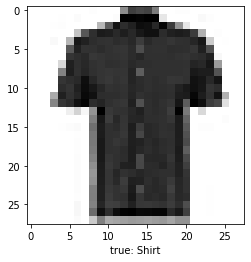

In [65]:
### shows image and true label of test image i

i = 40 # simply change here if you want another test image
img = test_images[i] # i^th test image
img_no_color_channel = img[:, :, 0]
true_label = class_names[test_labels[i]]
plt.imshow(img_no_color_channel, cmap=plt.cm.binary)
plt.xlabel(f"true: {true_label}")
plt.show()

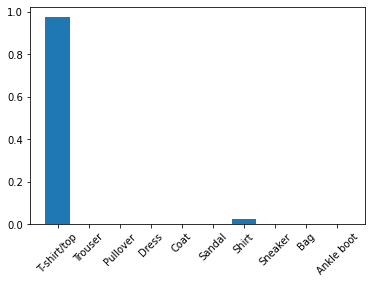

In [10]:
### displays probability distribution of labels of test image i that the model predicts

probs = model.predict(np.expand_dims(img, 0)) # we use np.expand_dims because predict must take in a *batch* of data
probs = probs[0] # predict outputs a *batch* of probability distributions
plt.bar(x=range(10), height=probs)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [23]:
'''
d = dict()
for i in range(10):
  d[i] = set()
for i in mismatches:
  model_pred = preds[i]
  d[test_labels[i]].add(model_pred)
'''

In [27]:
# confusion matrix
# By definition a confusion matrix C is such that C_ij is equal to the number of observations known to be in group i and predicted to be in group j.
c = confusion_matrix(y_true=test_labels, y_pred=preds)

array([[821,   0,  32,  20,   1,   0, 118,   0,   8,   0],
       [  2, 969,   0,  21,   2,   0,   5,   0,   1,   0],
       [ 10,   0, 933,   5,  18,   0,  34,   0,   0,   0],
       [ 14,   1,  34, 893,  29,   0,  29,   0,   0,   0],
       [  0,   0, 437,  26, 428,   0, 107,   0,   2,   0],
       [  0,   0,   0,   1,   0, 935,   0,  51,   0,  13],
       [113,   1, 144,  21,  25,   0, 688,   0,   8,   0],
       [  0,   0,   0,   0,   0,   2,   0, 984,   0,  14],
       [  2,   0,   7,   3,   3,   2,   4,   4, 975,   0],
       [  1,   0,   0,   0,   0,   2,   0,  45,   0, 952]])

In [31]:
### the largest off-diagonal entries are where the model gets confused the most

# known: 4, pred: 2
print(class_names[4])
print(class_names[2])
print('---')
# indeed, the model confuses Coat and Pullover the most often

# known: 6, pred: 2
print(class_names[6])
print(class_names[2])
print('---')

# known: 0, pred: 6
print(class_names[0])
print(class_names[6])
print('---')
# this is T-shirt/top vs. Shirt. Their difference is that Shirts have buttons while T-shirts don't

Coat
Pullover
---
Shirt
Pullover
---
T-shirt/top
Shirt
---


In [47]:
# so the model gets confused with labels 0, 2, 4, 6 the most.
# form a second training set by taking all the training data with labels 0, 2, 4, 6
# plus 20% of the remaining, not-confusing data
confusing_labels = [0, 2, 4, 6]
confusing_mask = np.isin(train_labels, confusing_labels) # confusing_mask is a boolean array
for i in range(len(confusing_mask)):
  if confusing_mask[i] == False:
    # 20%
    b = np.random.binomial(n=1, p=.2)
    if b == 1:
      confusing_mask[i] = True

confusing_indices = [i for i in range(len(confusing_mask)) if confusing_mask[i]]
# shuffle the indices
np.random.shuffle(confusing_indices)


confusing_train_images = train_images[confusing_indices]
confusing_train_labels = train_labels[confusing_indices]

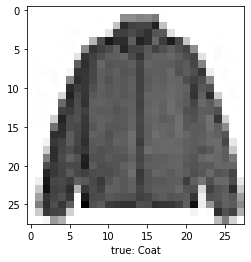

In [57]:
# plot some images in confusing_train_images
i = 9
img = confusing_train_images[i]
img_no_color_channel = img[:, :, 0]
true_label = class_names[confusing_train_labels[i]]
plt.imshow(img_no_color_channel, cmap=plt.cm.binary)
plt.xlabel(f"true: {true_label}")
plt.show()

In [59]:
# second training round: use confusing_train_images, confusing_train_labels

CHECKPOINT_PATH = '/content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_with_dropout_training_2_epoch={epoch}.ckpt'

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=CHECKPOINT_PATH, 
    verbose=1, 
    save_weights_only=True,
    save_freq = 'epoch')

train_model = model.fit(confusing_train_images, confusing_train_labels, batch_size=BATCH_SIZE, epochs=50, callbacks=[cp_callback])

Epoch 1/50
244/245 [============================>.] - ETA: 0s - loss: 0.2188 - accuracy: 0.9136
Epoch 1: saving model to /content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_with_dropout_training_2_epoch=1.ckpt
245/245 [==============================] - 42s 170ms/step - loss: 0.2188 - accuracy: 0.9136
Epoch 2/50
244/245 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9158
Epoch 2: saving model to /content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_with_dropout_training_2_epoch=2.ckpt
245/245 [==============================] - 39s 159ms/step - loss: 0.2164 - accuracy: 0.9158
Epoch 3/50
244/245 [============================>.] - ETA: 0s - loss: 0.2163 - accuracy: 0.9150
Epoch 3: saving model to /content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_with_dropout_training_2_epoch=3.ckpt
245/245 [==============================] - 47s 191ms/step - loss: 0.2162 - accuracy: 0.9151
Epoch 4/50
244/245 [============================>.] - ETA: 0s - loss: 0.2100 - acc

In [61]:
loss, acc = model.evaluate(test_images, test_labels, verbose=2, batch_size=BATCH_SIZE) # still bad test acc: 84.78%

79/79 - 3s - loss: 0.4928 - accuracy: 0.8478 - 3s/epoch - 37ms/step


In [62]:
probs = model.predict(test_images)
# since predict outputs a *batch* of probability distributions, the shape of probs is (10000, 10)

In [63]:
mismatches = [] # stores the indices of test images with incorrect predictions
preds = np.argmax(probs, axis=1) # model predictions. applies np.argmax to each probability distribution, an array of length 10
for i in range(TEST_LABELS_SIZE):
  if preds[i] != test_labels[i]:
    mismatches.append(i)

print(mismatches)
print(len(mismatches))

[6, 21, 25, 29, 40, 42, 48, 51, 53, 67, 68, 86, 89, 98, 107, 124, 127, 130, 136, 145, 147, 150, 153, 155, 168, 170, 187, 188, 192, 197, 210, 213, 227, 229, 238, 239, 244, 252, 266, 271, 279, 282, 283, 313, 315, 316, 324, 325, 332, 340, 344, 352, 363, 378, 381, 382, 389, 395, 396, 404, 405, 419, 433, 437, 441, 444, 446, 451, 452, 454, 457, 460, 461, 465, 471, 475, 480, 488, 490, 491, 510, 511, 512, 526, 529, 536, 540, 541, 548, 558, 563, 564, 565, 569, 570, 572, 577, 578, 585, 600, 607, 628, 634, 635, 639, 648, 653, 663, 665, 669, 670, 673, 674, 681, 684, 688, 689, 699, 701, 702, 711, 722, 727, 732, 738, 741, 753, 760, 762, 769, 779, 782, 787, 798, 800, 801, 805, 815, 827, 828, 829, 830, 846, 851, 856, 860, 877, 881, 898, 902, 905, 909, 924, 926, 932, 933, 935, 948, 953, 965, 966, 977, 979, 987, 993, 994, 997, 1000, 1004, 1005, 1025, 1026, 1028, 1053, 1055, 1056, 1065, 1066, 1077, 1091, 1101, 1104, 1111, 1121, 1130, 1131, 1132, 1136, 1139, 1140, 1152, 1162, 1165, 1172, 1183, 1185, 1192,

<h1>Reload the model below if you need to:</h1>

In [5]:
### model with dropout ###

# We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers
model = tf.keras.Sequential()

# dropout
model.add(tf.keras.layers.Dropout(.3, input_shape=(28, 28, 1)))

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28, 1), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(.3))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model.add(Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(.3))

# Fully connected layer with ReLU activation function 
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(Dense(10, activation=tf.nn.softmax))

### compile model ###

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

### load weights ###
model.load_weights('/content/gdrive/My Drive/Colab/checkpoints/clothing_CNN_with_dropout_epoch=100.ckpt')

In [60]:
'hello '

'hello '